# GPU Check

In [1]:
import tensorflow as tf
import time

# Check if a GPU is available
print("Available device:", tf.config.list_physical_devices('GPU'))

# Perform an intensive operation
start = time.time()
a = tf.random.normal([10000, 10000])
b = tf.matmul(a, a)
print("GPU computation time:", time.time() - start)

Available device: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU computation time: 0.8031399250030518


#Import Libraries

In [27]:
!pip install mediapipe

In [3]:
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.python.client import device_lib

In [4]:
# Import the device_lib module from TensorFlow to check available hardware devices
from tensorflow.python.client import device_lib
# List and print all available devices (CPU, GPU, etc.) on the system
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3373958951409432249
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14619377664
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17395676767024701516
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


#Set the Directory

In [5]:
# Import the drive module from Google Colab to access Google Drive
from google.colab import drive
# Mount Google Drive to the specified directory in Colab
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import sys  # Import the sys module to access system-specific parameters and functions
# Add a specific directory to the system path
sys.path.append('/content/drive/Shareddrives/AI Project 2024_2025/AI Project 2024_2025/OUR HANDS/tracking training')

In [7]:
import os
# Define the path to the new directory
new_directory = '/content/drive/Shareddrives/AI Project 2024_2025/AI Project 2024_2025/OUR HANDS/tracking training'
# Check if the specified directory exists
if os.path.exists(new_directory):
    os.chdir(new_directory) # If the directory exists, change the current working directory to the new directory
    print("Current dir:", os.getcwd()) # Print the current working directory to confirm the change
else:
    print("Directory not existing:", new_directory) # If the directory does not exist, print a message

Current dir: /content/drive/Shareddrives/AI Project 2024_2025/AI Project 2024_2025/OUR HANDS/tracking training


In [40]:
# Define the path to the training dataset directory
train_dir = '/content/drive/Shareddrives/AI Project 2024_2025/AI Project 2024_2025/OUR HANDS/tracking training/asl_alphabet_train'
# Define the path to the test dataset directory
test_dir = '/content/drive/Shareddrives/AI Project 2024_2025/AI Project 2024_2025/OUR HANDS/tracking training/asl_alphabet_test'

#Mediapipe Approach

In [48]:
import mediapipe as mp
import os
import numpy as np
import cv2

# Initialize MediaPipe Hands model
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()  # Instance for hand tracking

# Function to process images and extract hand landmarks
def get_hand_tracking_data(data_dir, class_names):
    """
    Loads images, extracts hand landmarks, and assigns class labels.

    Parameters:
    - data_dir: Path to dataset directory.
    - class_names: List of classes to include.

    Returns:
    - images: NumPy array of processed images.
    - labels: NumPy array of integer class labels.
    """

    images = []  # Store processed images
    labels = []  # Store class labels

    # Map class names to integer values (0 to 4)
    class_mapping = {class_name: i for i, class_name in enumerate(class_names)}

    # Loop through dataset folders
    for class_name in os.listdir(data_dir):
        if class_name not in class_mapping:  # Skip unwanted classes
            continue

        print(f"Processing images of {class_name}...")
        class_dir = os.path.join(data_dir, class_name)

        if os.path.isdir(class_dir):  # Check if it's a valid folder
            for image_name in os.listdir(class_dir):  # Iterate over images
                img_path = os.path.join(class_dir, image_name)
                img = cv2.imread(img_path)  # Read image

                if img is not None:
                    img = cv2.resize(img, (64, 64))  # Resize to 64x64
                    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR → RGB
                    results = hands.process(img_rgb)  # Detect hand landmarks

                    if results.multi_hand_landmarks:
                        for hand_landmarks in results.multi_hand_landmarks:
                            landmarks = []
                            for landmark in hand_landmarks.landmark:
                                landmarks.append([landmark.x, landmark.y])

                            landmarks = np.array(landmarks).flatten()  # Convert to 1D array
                            images.append(img)
                            labels.append(class_mapping[class_name])  # Store integer class label

    return np.array(images), np.array(labels)  # Return image data + class labels

# Load only the 5 selected classes
selected_classes = ['D', 'H', 'K', 'S', 'X']
x_train, y_train = get_hand_tracking_data(train_dir, selected_classes)
x_test, y_test = get_hand_tracking_data(test_dir, selected_classes)

# Convert labels to categorical (one-hot encoding)
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=len(selected_classes))  # Convert labels → one-hot (5 classes)
y_test = to_categorical(y_test, num_classes=len(selected_classes))    # Convert labels → one-hot (5 classes)


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2)
# This splits 80% of the data into training and 20% into testing
# Verify shapes
print(f"x_train shape: {x_train.shape}")  # Should be (num_samples, 64, 64, 3)
print(f"y_train shape: {y_train.shape}")  # Should be (num_samples, 5)
print(f"x_test shape: {x_test.shape}")    # Should be (num_samples, 64, 64, 3)
print(f"y_test shape: {y_test.shape}")    # Should be (num_samples, 5)



Processing images of K...
Processing images of D...
Processing images of X...
Processing images of H...
Processing images of S...
x_train shape: (3232, 64, 64, 3)
y_train shape: (3232, 5)
x_test shape: (809, 64, 64, 3)
y_test shape: (809, 5)


In [49]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2)
# This splits 80% of the data into training and 20% into testing
# Verify shapes
print(f"x_train shape: {x_train.shape}")  # Should be (num_samples, 64, 64, 3)
print(f"y_train shape: {y_train.shape}")  # Should be (num_samples, 5)
print(f"x_test shape: {x_test.shape}")    # Should be (num_samples, 64, 64, 3)
print(f"y_test shape: {y_test.shape}")    # Should be (num_samples, 5)

x_train shape: (2585, 64, 64, 3)
y_train shape: (2585, 5)
x_test shape: (647, 64, 64, 3)
y_test shape: (647, 5)


In [50]:
# Save training and testing data for hand tracking to .npy files
# Save the training images to a .npy file
np.save('x_train_hand_tracking.npy', x_train)
# Save the training labels (one-hot encoded) to a .npy file
np.save('y_train_hand_tracking.npy', y_train)
# Save the testing images to a .npy file
np.save('x_test_hand_tracking.npy', x_test)
# Save the testing labels (one-hot encoded) to a .npy file
np.save('y_test_hand_tracking.npy', y_test)

In [51]:
# Load the previously saved numpy arrays containing the data for training and testing
x_test = np.load('x_test_hand_tracking.npy')  # Load test image data
y_test = np.load('y_test_hand_tracking.npy')  # Load test labels (one-hot encoded)
x_train = np.load('x_train_hand_tracking.npy')  # Load training image data
y_train = np.load('y_train_hand_tracking.npy')  # Load training labels (one-hot encoded)

# Print the shape of the loaded data arrays to verify the dimensions
print(f"x_test shape: {x_test.shape}")  # Output the shape of the test images
print(f"y_test shape: {y_test.shape}")  # Output the shape of the test labels
print(f"x_train shape: {x_train.shape}")  # Output the shape of the training images
print(f"y_train shape: {y_train.shape}")  # Output the shape of the training labels

# Print the range of pixel values in the test dataset to ensure normalization is correct
print(f"Range dei pixel: Min {x_test.min()}, Max {x_test.max()}")  # Show the min and max pixel values in the test set

x_test shape: (647, 64, 64, 3)
y_test shape: (647, 5)
x_train shape: (2585, 64, 64, 3)
y_train shape: (2585, 5)
Range dei pixel: Min 0, Max 255


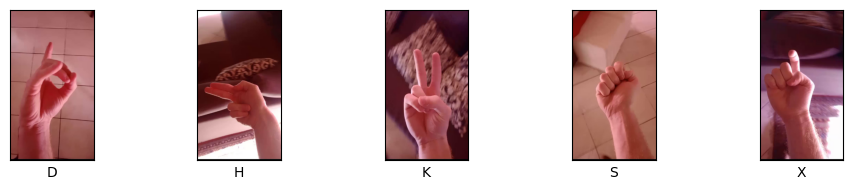

In [ ]:
def plot_sample_images():
    # Create a figure with a specific size (10 inches by 2 inches)
    plt.figure(figsize=(10, 2))  # Adjust the size to fit 5 images nicely

    # Loop over the 5 labels (assuming the dataset has 5 classes)
    for i in range(5):
        plt.subplot(1, 5, i + 1)  # 1 row, 5 columns. This sets up the subplot grid
        plt.xticks([])  # Remove x-axis ticks
        plt.yticks([])  # Remove y-axis ticks

        # Load a sample image for the current class
        path = os.path.join(train_dir, classes[i], f"{classes[i]}_1.png")  # Build the path to the sample image
        img = plt.imread(path)  # Read the image
        plt.imshow(img)  # Display the image
        plt.xlabel(classes[i])  # Set the label of the current class (D, H, K, S, or X)

    # Make sure the layout is tight so the images do not overlap
    plt.tight_layout()

    # Display the plot
    plt.show()

# Call the function to plot sample images
plot_sample_images()

#Model Architecture and Compilation

In [37]:
# Define the number of classes, batch size, epochs, and learning rate for training
classes = 5  # Total number of different classes/labels (e.g., 'D', 'H', 'K', 'S', 'X')
batch = 32  # Batch size for training. Can be adjusted to other values like 16, 64 depending on memory constraints
epochs = 30  # Number of training epochs. Other options could be 50, 100, etc.
learning_rate = 0.01  # Learning rate for the optimizer. It could be set to values like 0.001, 0.005 depending on model performance

# Adam optimizer with the defined learning rate
adam = Adam(learning_rate)

# Import required Keras layers and model components
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import AveragePooling2D

# Initialize a sequential model
model = Sequential()

# Add input layer with the shape of (64, 64, 3) for color images of size 64x64
model.add(Input(shape=(64, 64, 3)))

# Add first convolutional layer with 64 filters, 3x3 kernel, padding 'same', and ReLU activation function
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

# Add average pooling layer with a pool size of (2, 2) to downsample the image
model.add(AveragePooling2D(pool_size=(2, 2)))

# Add batch normalization to improve convergence during training
model.add(BatchNormalization())

# Add second convolutional layer with 128 filters, 3x3 kernel, padding 'same', and ReLU activation
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))

# Add another average pooling layer
model.add(AveragePooling2D(pool_size=(2, 2)))

# Add batch normalization again
model.add(BatchNormalization())

# Add a Dropout layer with a 40% rate to avoid overfitting
model.add(Dropout(0.4))

# Add third convolutional layer with 256 filters, 3x3 kernel, padding 'same', and ReLU activation
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))

# Add another average pooling layer
model.add(AveragePooling2D(pool_size=(2, 2)))

# Add batch normalization for the final convolution layer
model.add(BatchNormalization())

# Flatten the output of the convolutional layers to a 1D array for input to fully connected layers
model.add(Flatten())

# Add a dropout layer to further reduce the chances of overfitting
model.add(Dropout(0.4))

# Add a dense fully connected layer with 1024 units and ReLU activation function
model.add(Dense(1024, activation='relu'))

# Add the final output layer with the number of units equal to the number of classes, using softmax for multi-class classification
model.add(Dense(classes, activation='softmax'))

# Compile the model with the Adam optimizer, categorical crossentropy loss (since it's a multi-class classification task), and accuracy as a metric
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping to monitor the validation loss and stop training when the validation loss doesn't improve for 7 epochs
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)

# Reduce learning rate if the validation loss plateaus, reducing the learning rate by a factor of 0.5
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

#Model Training

In [52]:
# Train the model using the training data (x_train and y_train)
history = model.fit(
    x_train,  # Input training data (images)
    y_train,  # Ground truth labels (one-hot encoded)
    batch_size=batch,  # Number of samples per gradient update (batch size)
    epochs=epochs,  # Total number of times to iterate over the training data
    validation_split=0.2,  # Fraction of the training data to be used as validation data (20% for validation)
    shuffle=True,  # Shuffle the training data before each epoch
    callbacks=[early_stop],  # List of callbacks to be used during training (early stopping here)
    verbose=1  # Verbosity level. 1 means progress bar will be shown
)

Epoch 1/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - accuracy: 0.8946 - loss: 0.3486 - val_accuracy: 0.5416 - val_loss: 8.2574
Epoch 2/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8391 - loss: 0.6583 - val_accuracy: 0.4255 - val_loss: 9.9567
Epoch 3/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7098 - loss: 1.3314 - val_accuracy: 0.3075 - val_loss: 8.3603
Epoch 4/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7855 - loss: 0.5741 - val_accuracy: 0.5783 - val_loss: 1.5389
Epoch 5/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8412 - loss: 0.4067 - val_accuracy: 0.8085 - val_loss: 0.5937
Epoch 6/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8300 - loss: 0.3971 - val_accuracy: 0.8375 - val_loss: 0.5171
Epoch 7/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8660 - loss: 0.3815 - val_accuracy: 0.8530 - val_loss: 0.8102
Epoch 8/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8873 - loss: 0.3191 - val_accuracy: 0.7853 - v

#Model Evaluation

In [57]:
# Evaluate the model on the training data (denormalized x_train and corresponding y_train labels)
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
# Print the accuracy and loss on the training data
print(f"Training Accuracy: {train_acc:.4f}")  # Display the training accuracy, rounded to 4 decimal places
print(f"Training Loss: {train_loss:.4f}")     # Display the training loss, rounded to 4 decimal places

# Evaluate the model on the test data (denormalized x_test and corresponding y_test labels)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
# Print the accuracy and loss on the test data
print(f"Test Accuracy: {test_acc:.4f}")  # Display the test accuracy, rounded to 4 decimal places
print(f"Test Loss: {test_loss:.4f}")     # Display the test loss, rounded to 4 decimal places

Training Accuracy: 0.9350
Training Loss: 0.1663
Test Accuracy: 0.9320
Test Loss: 0.2592


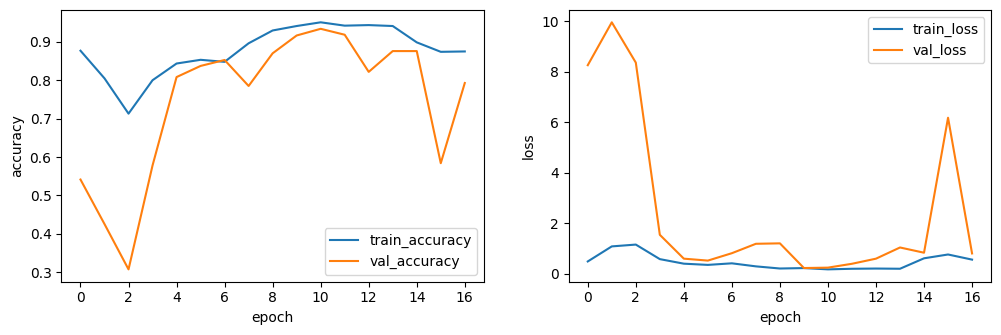

In [53]:
def plot_results():
    plt.figure(figsize=(12, 12))

    # Plot training and validation accuracy
    plt.subplot(3, 2, 1)
    plt.plot(history.history['accuracy'], label='train_accuracy')  # Training accuracy
    plt.plot(history.history['val_accuracy'], label='val_accuracy')  # Validation accuracy
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(3, 2, 2)
    plt.plot(history.history['loss'], label='train_loss')  # Training loss
    plt.plot(history.history['val_loss'], label='val_loss')  # Validation loss
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()

    plt.show()

# Call the function to display the plots
plot_results()

#Save the Model

In [54]:
# Save the trained model in the Keras .keras format
model.save('asl_model_V3.keras')

# Load the Model

In [ ]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('asl_model_V3.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 18 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [55]:
import numpy as np

# Load the data saved in .npy format
x_test = np.load('x_test_hand_tracking.npy')
y_test = np.load('y_test_hand_tracking.npy')
x_train = np.load('x_train_hand_tracking.npy')
y_train = np.load('y_train_hand_tracking.npy')

# Print the shapes of the loaded datasets
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

# Check the range of pixel values in x_test dataset
print(f"Range dei pixel: Min {x_test.min()}, Max {x_test.max()}")

x_test shape: (647, 64, 64, 3)
y_test shape: (647, 5)
x_train shape: (2585, 64, 64, 3)
y_train shape: (2585, 5)
Range dei pixel: Min 0, Max 255


# Predictions

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


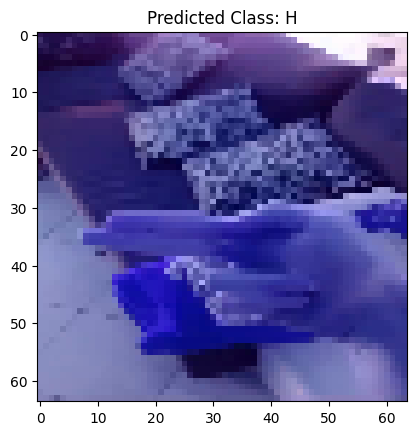

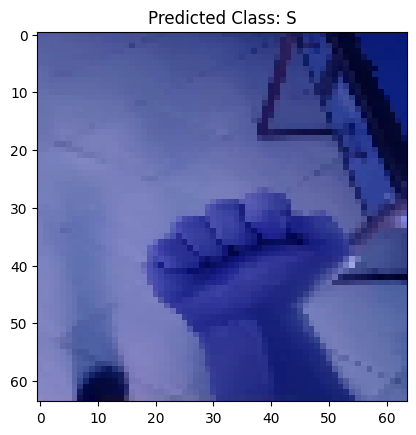

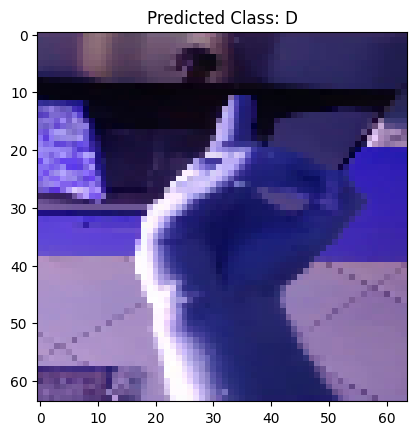

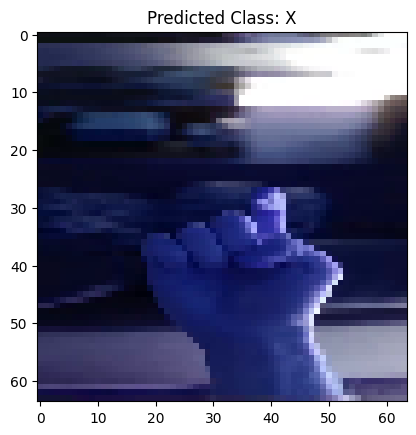

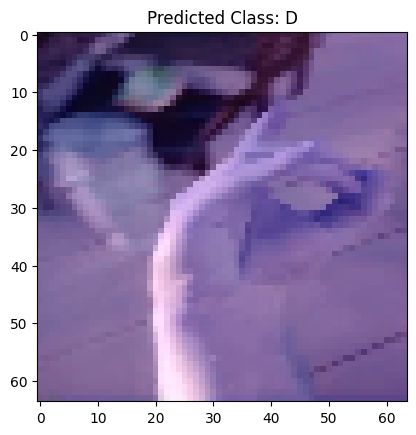

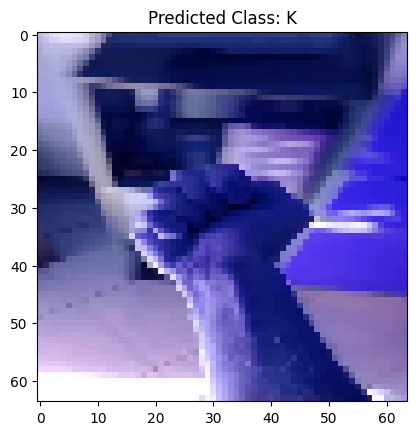

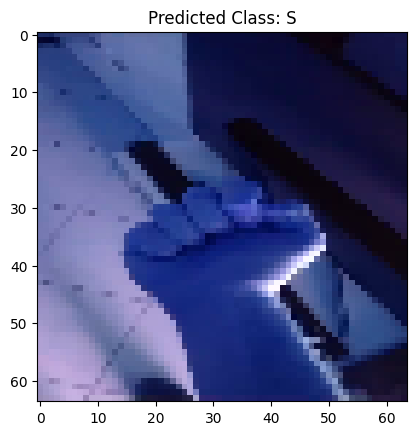

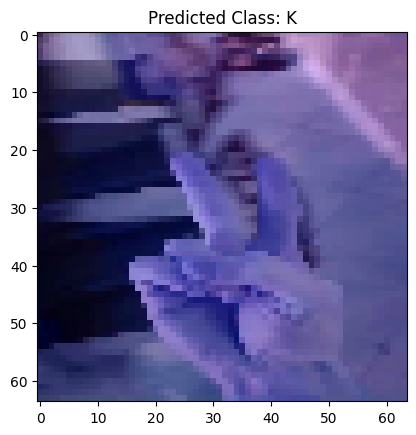

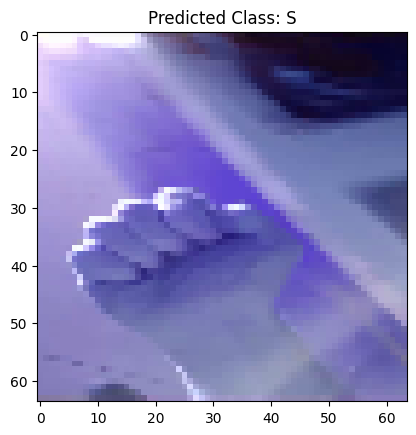

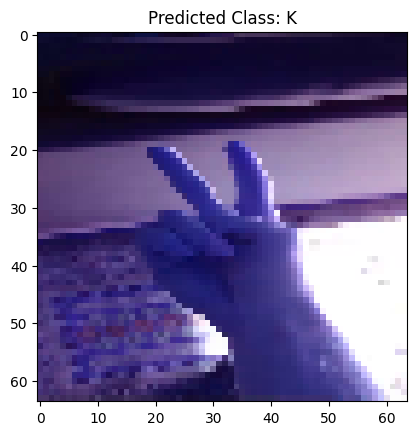

In [ ]:
classes = ['D', 'H', 'K', 'S', 'X']  # Define the classes for the predictions

# Generate predictions for the test set using the trained model
predictions = model.predict(x_test)

# Loop through the first 10 samples in the test set
for i in range(10):
    # Get the index of the predicted class with the highest probability
    predicted_class_index = np.argmax(predictions[i])
    predicted_class = classes[predicted_class_index]  # Map the index to the class label

    # Display the image from the test set
    plt.imshow(x_test[i], cmap='gray')  # Display the image in grayscale
    plt.title(f'Predicted Class: {predicted_class}')  # Set the title with predicted class
    plt.show()  # Show the image with prediction result

# Create a dictionary to match positional indices to letters

In [ ]:
# Define the labels for ASL signs (update based on your dataset)
labels = {
    0: 'D',  # Class index 0 corresponds to the 'D' sign
    1: 'H',  # Class index 1 corresponds to the 'H' sign
    2: 'K',  # Class index 2 corresponds to the 'K' sign
    3: 'S',  # Class index 3 corresponds to the 'S' sign
    4: 'X'   # Class index 4 corresponds to the 'X' sign
}

# Incorrect predictions classified

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Index: 5, Predicted: K, Expected: S


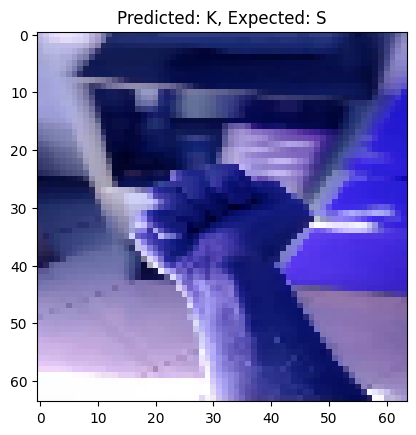

Index: 16, Predicted: X, Expected: S


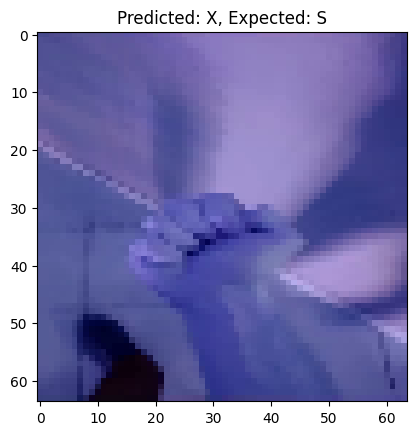

Index: 21, Predicted: S, Expected: K


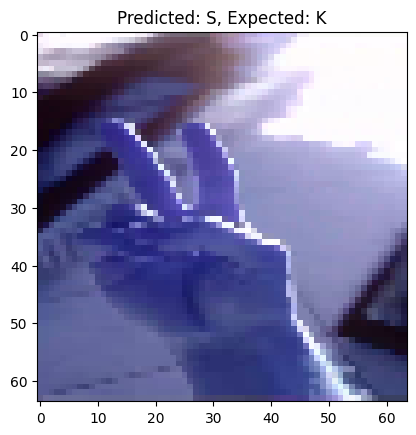

Index: 39, Predicted: S, Expected: K


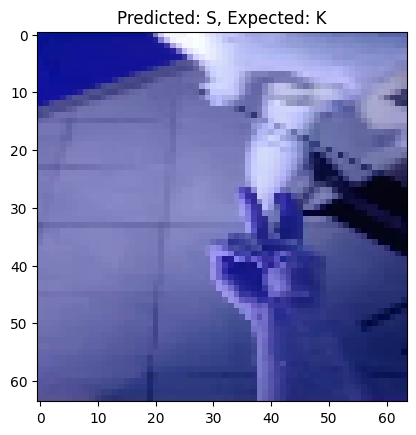

Index: 68, Predicted: S, Expected: X


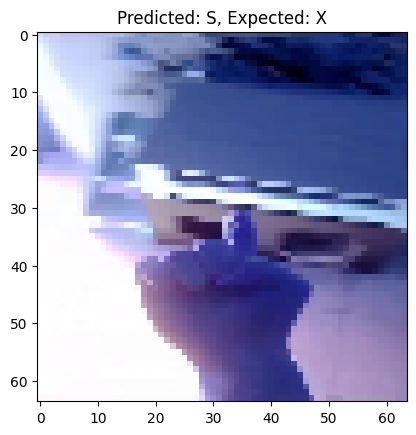

In [ ]:
# Initialize an empty list to store incorrect predictions
incorrect_predictions = []

# Get predictions for the test set using the trained model
predictions = model.predict(x_test)

# Loop through each prediction and the corresponding ground truth label
for i, (p, e) in enumerate(zip(predictions, y_test)):
    # Get the predicted class (index of the highest probability) and expected class (true label)
    predicted, expected = np.argmax(p), np.argmax(e)

    # If the prediction is incorrect (predicted class does not match expected class)
    if predicted != expected:
        # Append the index, image, predicted label, and expected label to the incorrect_predictions list
        incorrect_predictions.append((i, x_test[i], labels[predicted], labels[expected]))

# Visualize the first 5 incorrect predictions
# Loop through the first 5 incorrect predictions
for idx, img, pred, exp in incorrect_predictions[:5]:  # Show only the first 5 errors
    # Print the index, predicted label, and expected label for each incorrect prediction
    print(f"Index: {idx}, Predicted: {pred}, Expected: {exp}")

    # Display the image of the incorrectly classified sample
    plt.imshow(img)
    plt.title(f"Predicted: {pred}, Expected: {exp}")  # Display predicted vs expected label in the title
    plt.show()  # Show the image with the title

In [ ]:
# Calculate the number of incorrect predictions by getting the length of the incorrect_predictions list
num_incorrect_predictions = len(incorrect_predictions)

# Print the number of mistaken (incorrect) predictions
print(f"Mistaken Predictions: {num_incorrect_predictions}")

Mistaken Predictions: 29


#Correct Predictions Classified

In [ ]:
# List to store correct predictions
correct_predictions = []

# Make predictions on the test data
predictions = model.predict(x_test)

# Iterate over the predictions and corresponding true labels
for i, (p, e) in enumerate(zip(predictions, y_test)):
    # Get the predicted and expected class labels by finding the index with the highest value
    predicted, expected = np.argmax(p), np.argmax(e)

    # Display predictions and expected values for the first 10 images
    if i < 10:
        print(f"Image {i}: Predicted {labels[predicted]} | Expected {labels[expected]}")

    # If the prediction matches the expected label, add it to the correct_predictions list
    if predicted == expected:
        correct_predictions.append((i, x_test[i], labels[predicted], labels[expected]))

# Calculate the number of correct predictions
num_correct_predictions = len(correct_predictions)

# Print the number of correct predictions out of total test images
print(f"Correct Predictions: {num_correct_predictions} out of {len(x_test)}")

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Image 0: Predicted H | Expected H
Image 1: Predicted S | Expected S
Image 2: Predicted D | Expected D
Image 3: Predicted X | Expected X
Image 4: Predicted D | Expected D
Image 5: Predicted K | Expected S
Image 6: Predicted S | Expected S
Image 7: Predicted K | Expected K
Image 8: Predicted S | Expected S
Image 9: Predicted K | Expected K
Correct Predictions: 644 su 673


#Confusion Matrix

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Shape of y_test: (673, 5)
Shape of y_pred: (673, 5)
Confusion Matrix (DataFrame):
     D    H    K    S    X
D  189    0    0    0    0
H    0  118    1    2    0
K    0    0  119    6    4
S    0    0    1  114    3
X    1    1    3    7  104


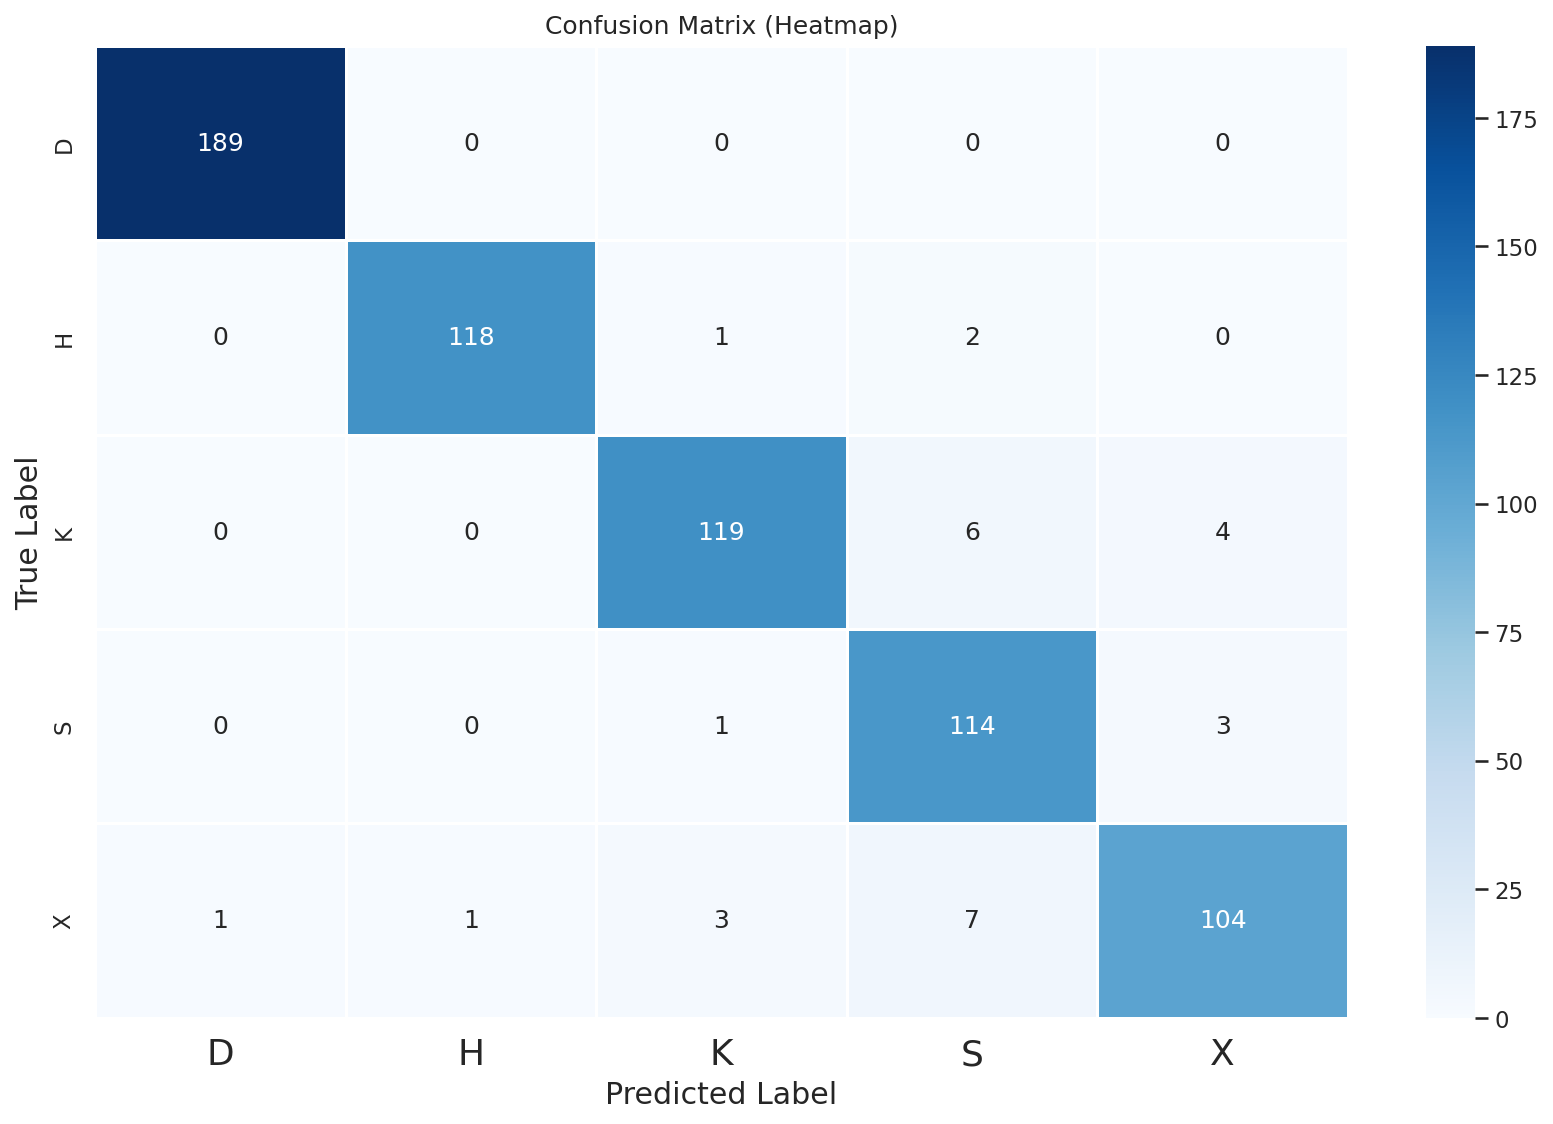

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import itertools

# Set style for the plots (Fivethirtyeight style for a modern look)
plt.style.use('fivethirtyeight')  # Use only one style
sns.set(context="notebook", palette="dark", style='whitegrid', color_codes=True)

# Global plot configuration parameters (adjusts general appearance of the plots)
params = {
    'axes.labelsize': "large",  # Set size of axis labels
    'xtick.labelsize': 'x-large',  # Set size of tick labels on x-axis
    'legend.fontsize': 20,  # Set legend font size
    'figure.dpi': 150,  # Set resolution of the figure
    'figure.figsize': [25, 7]  # Set figure size
}

plt.rcParams.update(params)  # Apply the defined global parameters to all plots

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function plots the confusion matrix.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize matrix if needed

    plt.imshow(cm, interpolation='nearest', cmap=cmap)  # Display matrix using a heatmap
    plt.title(title)  # Title of the confusion matrix plot
    plt.colorbar()  # Display a colorbar for the heatmap
    tick_marks = np.arange(len(classes))  # Create tick marks for class labels
    plt.xticks(tick_marks, classes, rotation=45)  # Set x-axis labels (predicted labels)
    plt.yticks(tick_marks, classes)  # Set y-axis labels (true labels)

    # Add annotations (matrix values) with proper color contrast
    thresh = cm.max() / 2.  # Threshold for text color (white for high values, black for low)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f'{cm[i, j]:.2f}' if normalize else f'{cm[i, j]}',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.ylabel('True label')  # Label for y-axis (true labels)
    plt.xlabel('Predicted label')  # Label for x-axis (predicted labels)

# Make predictions on the test dataset
y_pred = model.predict(x_test)  # Predictions on the test data

labels_cm = ("D","H","K","S","X")  # Class labels for the ASL alphabet

# Check the shapes of y_test and y_pred to understand their format
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of y_pred: {y_pred.shape}")

# If y_test is one-hot encoded, we need to convert it to label indices using argmax
if y_test.ndim > 1:  # If y_test is a 2D array (one-hot encoded)
    y_test = np.argmax(y_test, axis=1)  # Convert to single column array of class indices

# Calculate the confusion matrix by comparing true labels with predicted ones
confusion_mtx = confusion_matrix(y_test, np.argmax(y_pred, axis=1))  # Predicted labels are found by taking the argmax of predictions

# Create a DataFrame for better visualization of the confusion matrix
df_cm = pd.DataFrame(confusion_mtx, index=labels_cm, columns=labels_cm)
print("Confusion Matrix (DataFrame):")
print(df_cm)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(12, 8))  # Set figure size for better visualization
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues", linewidths=.5)  # Annotate the heatmap with values
plt.title("Confusion Matrix (Heatmap)")  # Title of the heatmap
plt.ylabel("True Label")  # Label for the y-axis (true labels)
plt.xlabel("Predicted Label")  # Label for the x-axis (predicted labels)
plt.show()  # Show the plot

#SHAP
#### Representation to show points that have positive (red) or negative (blue) impact on correct predictions

  0%|          | 0/4998 [00:00<?, ?it/s]

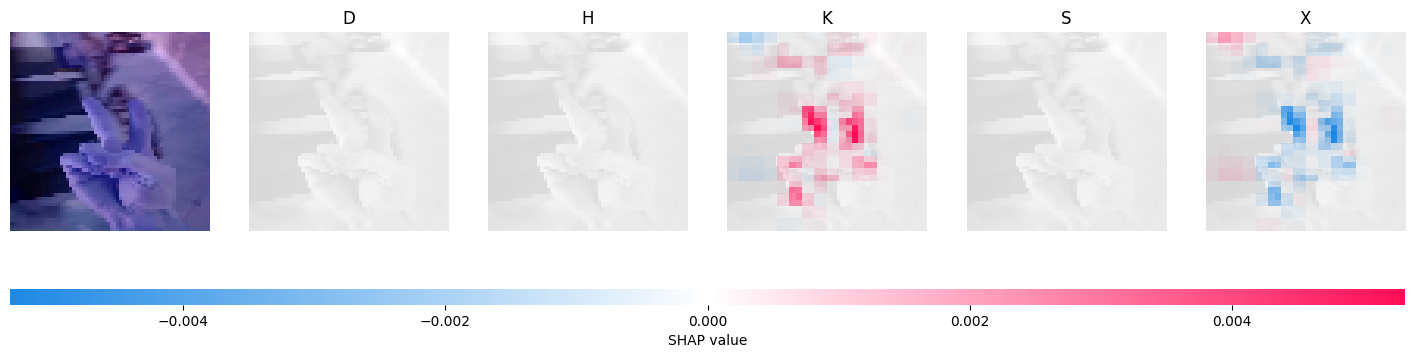

In [ ]:
import shap

# Assuming you have a pre-trained model called `model`
def f(x):
    # The model function that simply takes in data and returns model predictions
    tmp = x.copy()  # Creating a copy of input to avoid changing the original
    return model(tmp)  # Return the model's predictions on the data
labels_cm = ("D","H","K","S","X")
# Step 1: Define masker for image data (with a blur operation)
masker_blur = shap.maskers.Image("blur(32,32)", x_test[0].shape)
# The masker applies a blur operation of size (32,32) on the input image to generate masks for SHAP evaluation

# Step 2: Select the first image from x_test for evaluation
ind = [8]  # Use the first image (index 0) from x_test for SHAP computation

# Step 3: Check if the image is in the correct range
x_test_processed = x_test[ind]  # Select the first image for further processing

# Step 4: Ensure x_test_processed is in the correct range (0-255 for integers or 0.0-1.0 for floats)
if x_test_processed.max() <= 255:
    # If it's integer (0-255), clip to that range
    x_test_processed = np.clip(x_test_processed, 0, 255)
elif x_test_processed.max() <= 1.0:
    # If it's float (0.0-1.0), clip to that range
    x_test_processed = np.clip(x_test_processed, 0, 1)

# Step 5: Create the SHAP explainer
explainer = shap.Explainer(f, masker_blur, output_names=labels_cm)
# Create a SHAP explainer that takes in the function `f`, the masker, and the number of output classes (5 classes here)

# Step 6: Calculate SHAP values using the original x_test data
shap_values_ = explainer(x_test_processed, max_evals=5000, batch_size=50)
# Calculate SHAP values for the selected image. The number of maximum evaluations is set to 5000 and batch size to 50.

# Step 7: Visualize the SHAP values for the selected image
shap.image_plot(shap_values_[0], show=True)
# This will plot the SHAP values for the first image, highlighting which parts of the image contributed most to the model’s decision.

# -----------------------------------------------------------------------------------------------------------------------------------------



# Testing against the original dataset

Shape delle immagini caricate: (15000, 64, 64, 3)
Range dei pixel: Min 0.0, Max 1.0
15000


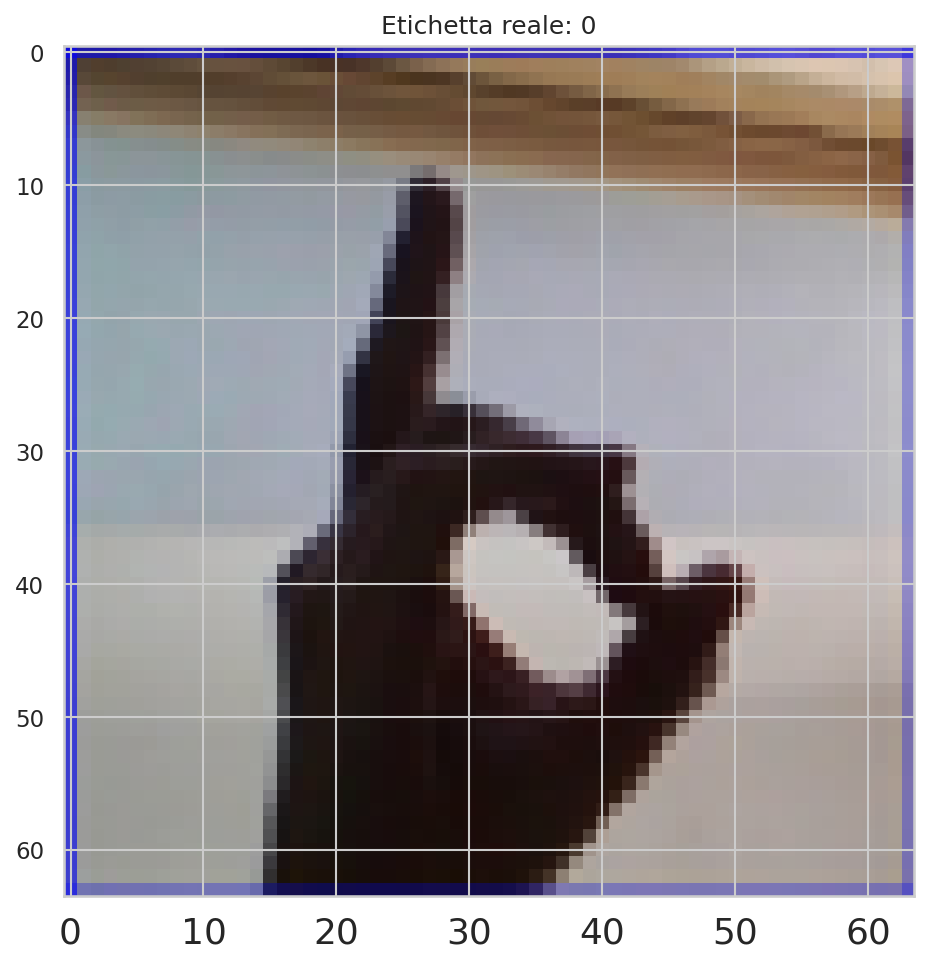

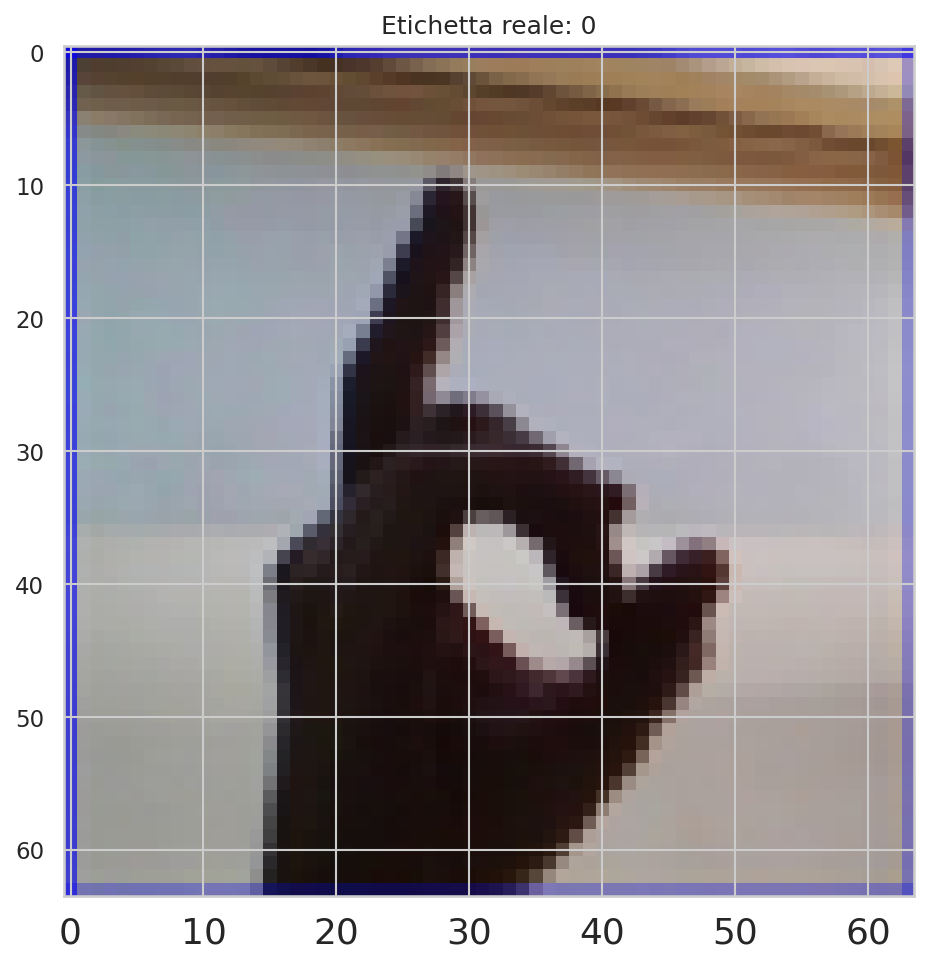

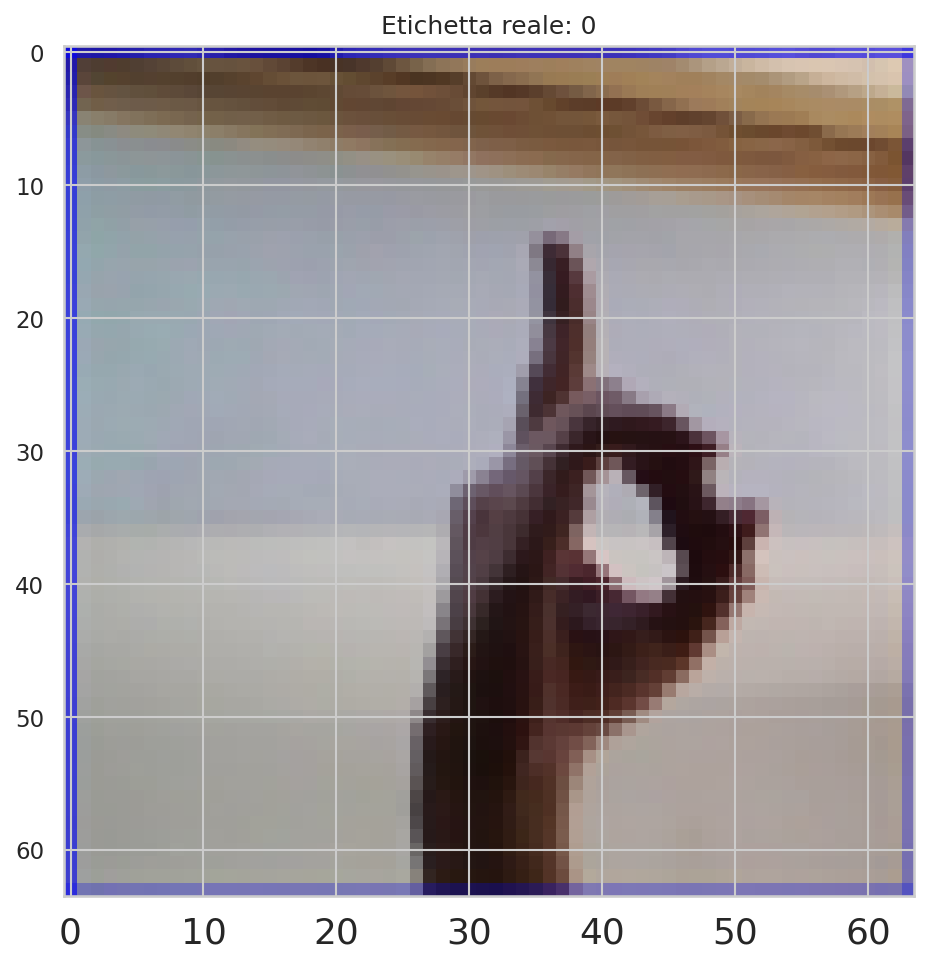

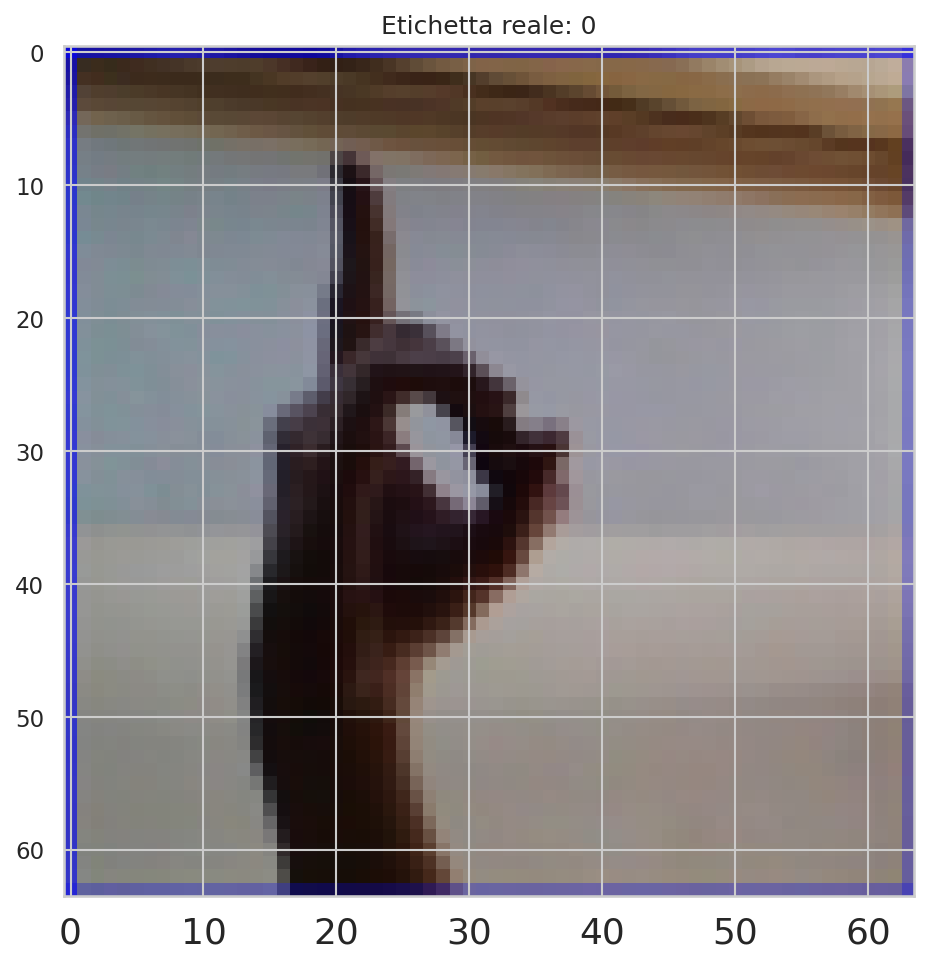

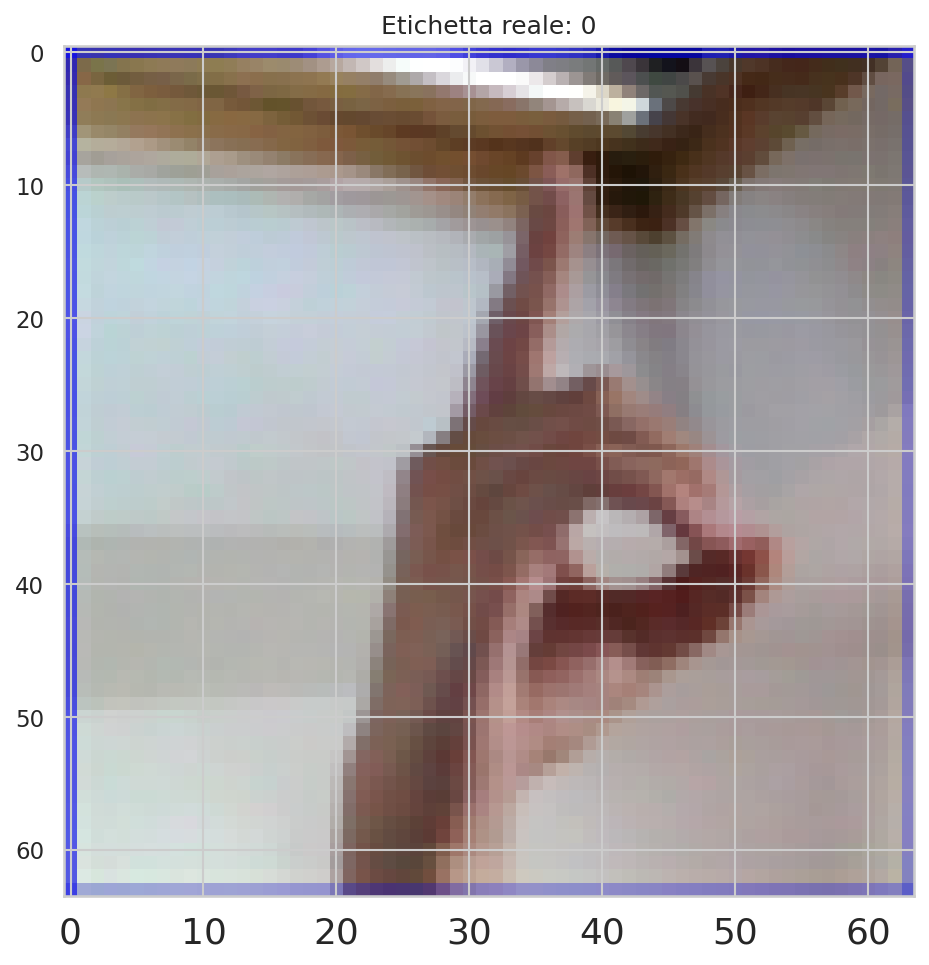

In [ ]:
# Load the previously saved data
x_test = np.load('olddata64.npy')  # Load the image data for testing
y_test = np.load('labels64.npy')   # Load the corresponding labels for the test data
x_test_pict = x_test  # Create a reference for visualization

# Check the shape and range of the images
print(f"Shape of the loaded images: {x_test.shape}")  # Print the shape (dimensions) of the images
print(f"Pixel range: Min {x_test.min()}, Max {x_test.max()}")  # Print the range of pixel values (Min and Max)
print(len(y_test))  # Print the number of labels (i.e., the number of test images)

# Visualize the first 5 test images along with their actual labels
for i in range(5):
    plt.imshow(x_test_pict[i], cmap='gray')  # Display the image using grayscale colormap
    plt.title(f'Actual label: {np.argmax(y_test[i])}')  # Show the actual label (converted from one-hot to class index)
    plt.show()

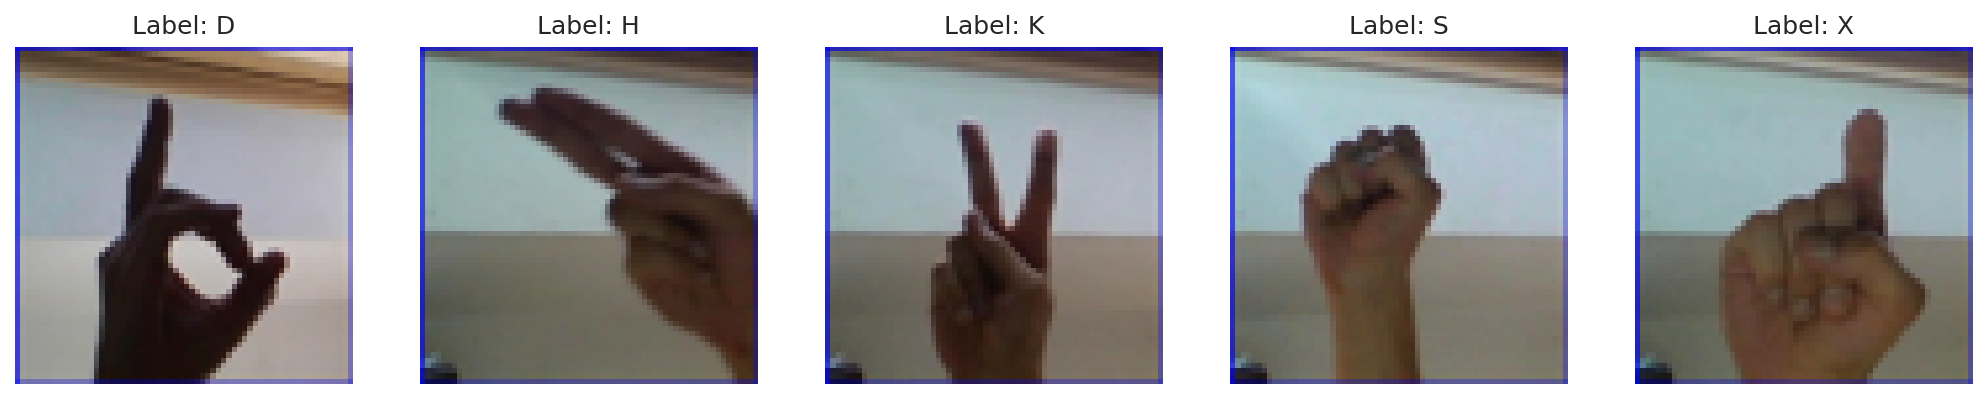

In [ ]:
# Load the saved data
x_test = np.load('olddata64.npy')  # Load the image test data from 'olddata64.npy'
y_test = np.load('labels64.npy')   # Load the associated labels for the test data from 'labels64.npy'

# If x_test is normalized between 0 and 1, denormalize it by multiplying by 255
x_test_img = x_test * 255  # Scale the pixel values back to the range 0-255

# Set up the plot with subplots for each class (one image per class)
fig, axes = plt.subplots(1, len(classes), figsize=(15, 5))  # Create a row of subplots for each class

# Loop through each class and display an image from that class
for i, label in enumerate(classes):
    # Find the indices of the images belonging to the current class (i)
    class_indices = np.where(y_test == i)[0]  # Find all indices where the class label matches 'i'
    image_index = class_indices[0]  # Take the first image from the class (just to display one image per class)
    image = x_test_img[image_index]  # Retrieve the image

    # Display the image in the corresponding subplot
    axes[i].imshow(image.astype(np.uint8))  # Convert the image data to uint8 for display
    axes[i].set_title(f"Label: {label}")  # Set the title to the label of the current class
    axes[i].axis('off')  # Hide the axis for better visualization

# Show the plot with all the images
plt.show()

incorrect

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
Index: 0, Predict: H, Expected: D


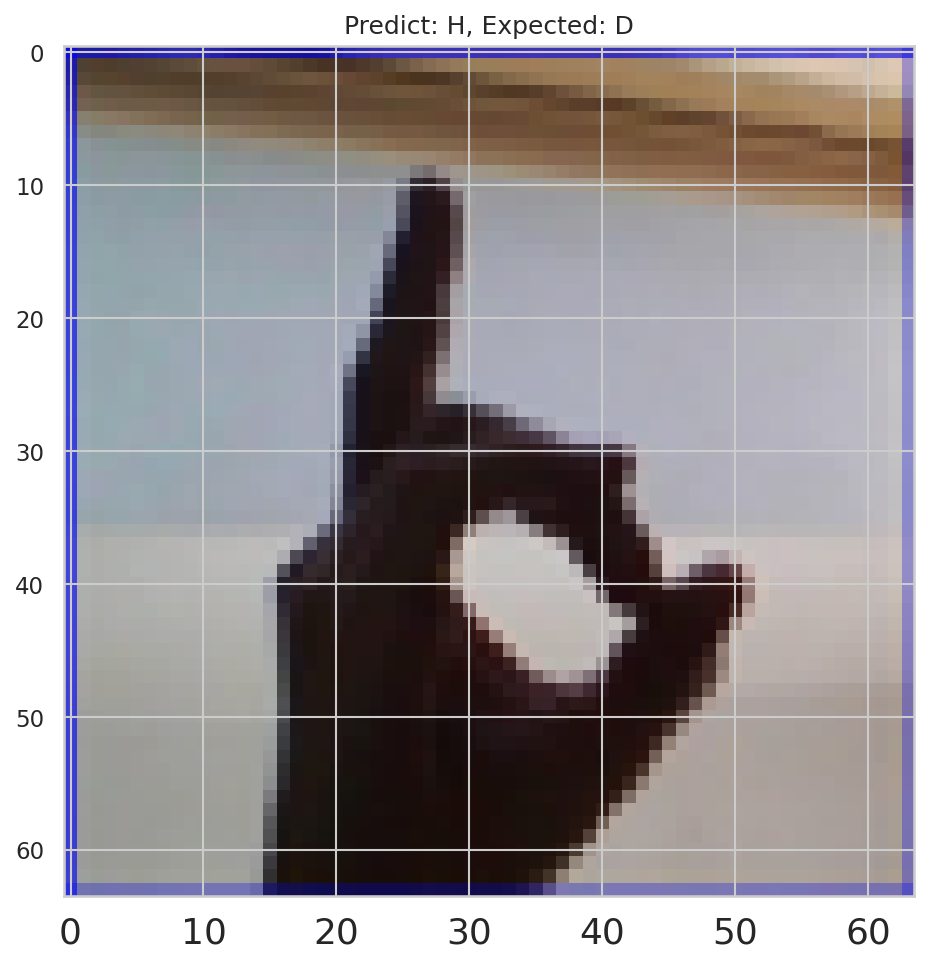

Index: 1, Predict: H, Expected: D


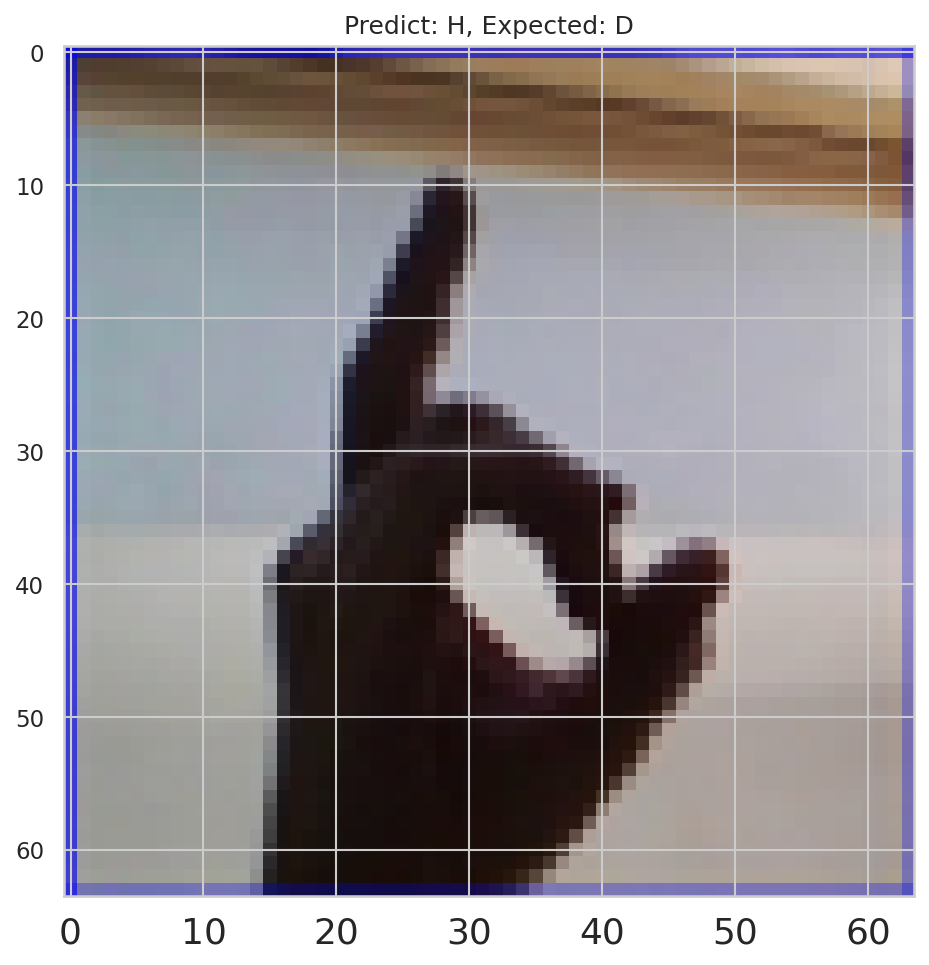

Index: 2, Predict: H, Expected: D


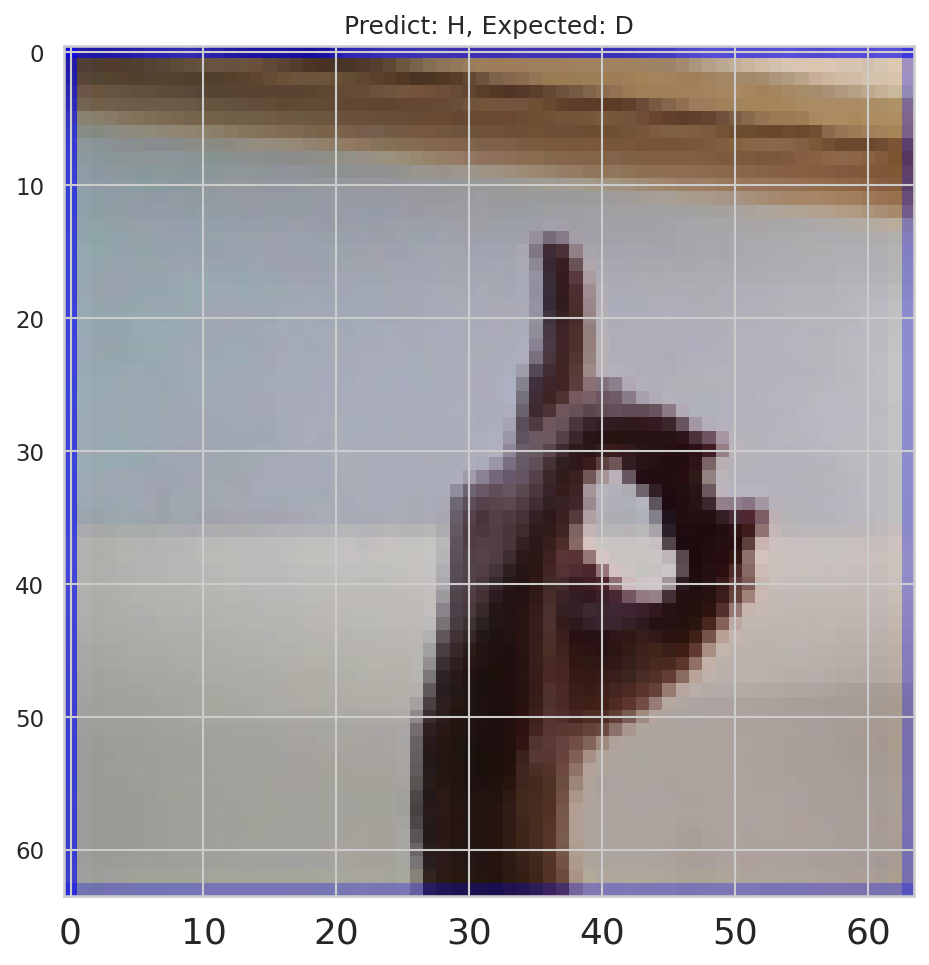

Index: 3, Predict: H, Expected: D


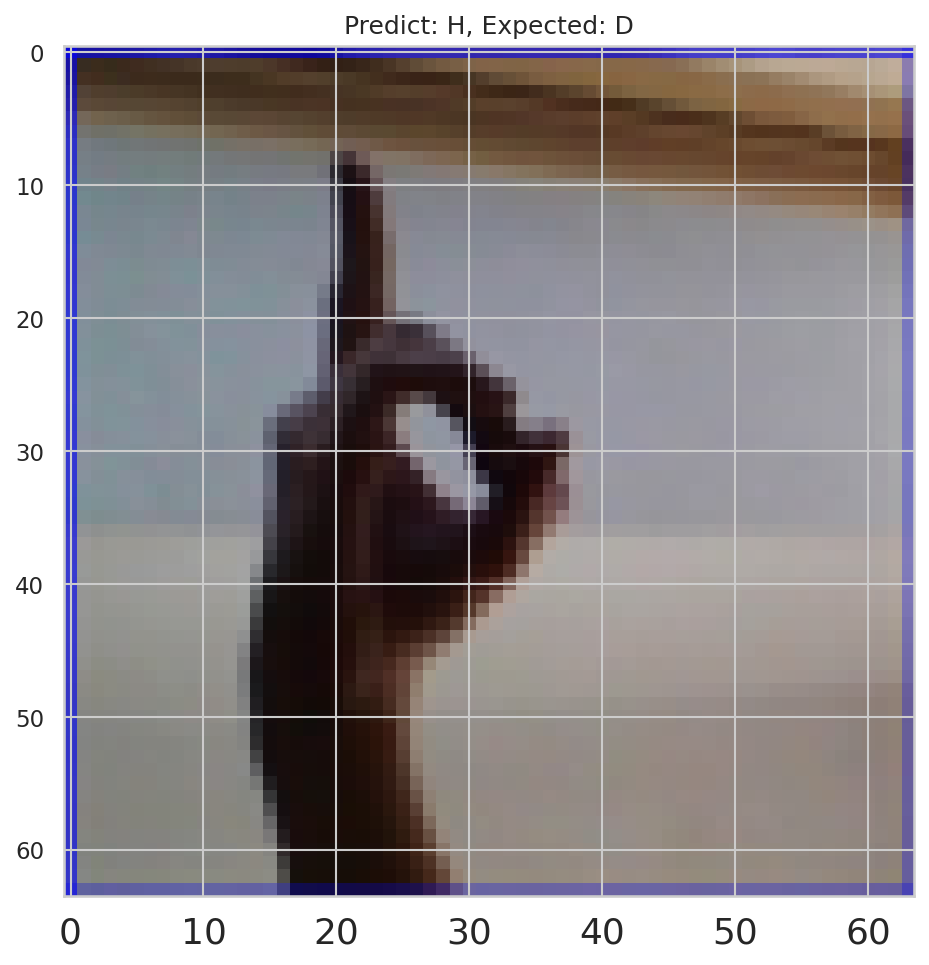

Index: 4, Predict: S, Expected: D


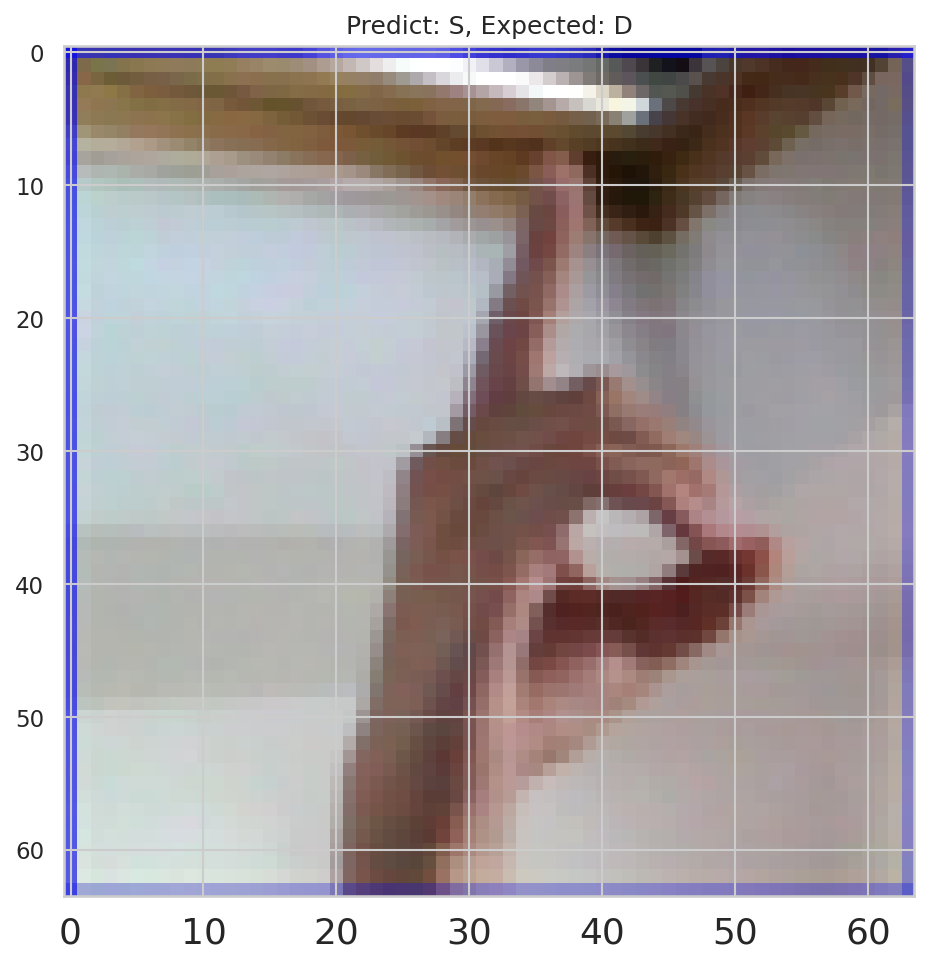

In [ ]:
# Create an empty list to store incorrect predictions
incorrect_predictions = []

# Make predictions on the test data
predictions = model.predict(x_test)  # Use the test data (x_test) to make predictions

# Loop through each prediction and compare it with the actual label
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)  # Get the predicted class and the expected (true) class

    # If the prediction is incorrect, add the index, image, predicted label, and expected label to the incorrect_predictions list
    if predicted != expected:
        incorrect_predictions.append((i, x_test_pict[i], labels[predicted], labels[expected]))

# Visualize the first 5 incorrect predictions (you can change this number if needed)
for idx, img, pred, exp in incorrect_predictions[:5]:  # Show the first 5 errors
    print(f"Index: {idx}, Predict: {pred}, Expected: {exp}")  # Print the index, predicted label, and expected label
    plt.imshow(img)  # Display the image that was misclassified
    plt.title(f"Predict: {pred}, Expected: {exp}")  # Set the title with predicted and expected labels
    plt.show()  # Show the image plot

In [ ]:
# Calculate the number of incorrect predictions by getting the length of the incorrect_predictions list
num_incorrect_predictions = len(incorrect_predictions)

# Print the number of mistaken predictions
print(f"Mistaken Predictions: {num_incorrect_predictions}")

Mistaken Predictions: 14988


#Correct Predictions

In [ ]:
# Initialize an empty list to store correct predictions
correct_predictions = []

# Use the model to predict on the test set (x_test)
predictions = model.predict(x_test)

# Iterate over the test data (y_test) and predicted values (predictions)
for i, (p, e) in enumerate(zip(predictions, y_test)):
    # Get the index of the predicted and expected labels (by taking the maximum value index)
    predicted, expected = np.argmax(p), np.argmax(e)

    # If the index is less than 10, print out the first 10 predictions
    if i < 10:
        print(f"Image {i}: Predicted {labels[predicted]} | Expected {labels[expected]}")

    # If the prediction is correct, append it to the list of correct predictions
    if predicted == expected:
        correct_predictions.append((i, x_test[i], labels[predicted], labels[expected]))

# Calculate the total number of correct predictions
num_correct_predictions = len(correct_predictions)

# Print the total number of correct predictions and the total number of test images
print(f"Correct Predictions: {num_correct_predictions} out of {len(x_test)}")

469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
Image 0: Predicted H | Expected D
Image 1: Predicted H | Expected D
Image 2: Predicted H | Expected D
Image 3: Predicted H | Expected D
Image 4: Predicted S | Expected D
Image 5: Predicted S | Expected D
Image 6: Predicted H | Expected D
Image 7: Predicted H | Expected D
Image 8: Predicted H | Expected D
Image 9: Predicted H | Expected D
Correct Predictions: 12 su 15000


#Confusion Matrix

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
Shape of y_test: (15000,)
Shape of y_pred: (15000, 5)
Confusion Matrix (DataFrame):
    D     H    K    S     X
D   0  1830   34  709   427
H   0  1560   59   51  1330
K   0  1441  126  400  1033
S   0  1807    8  287   898
X  12  1236  283  370  1099


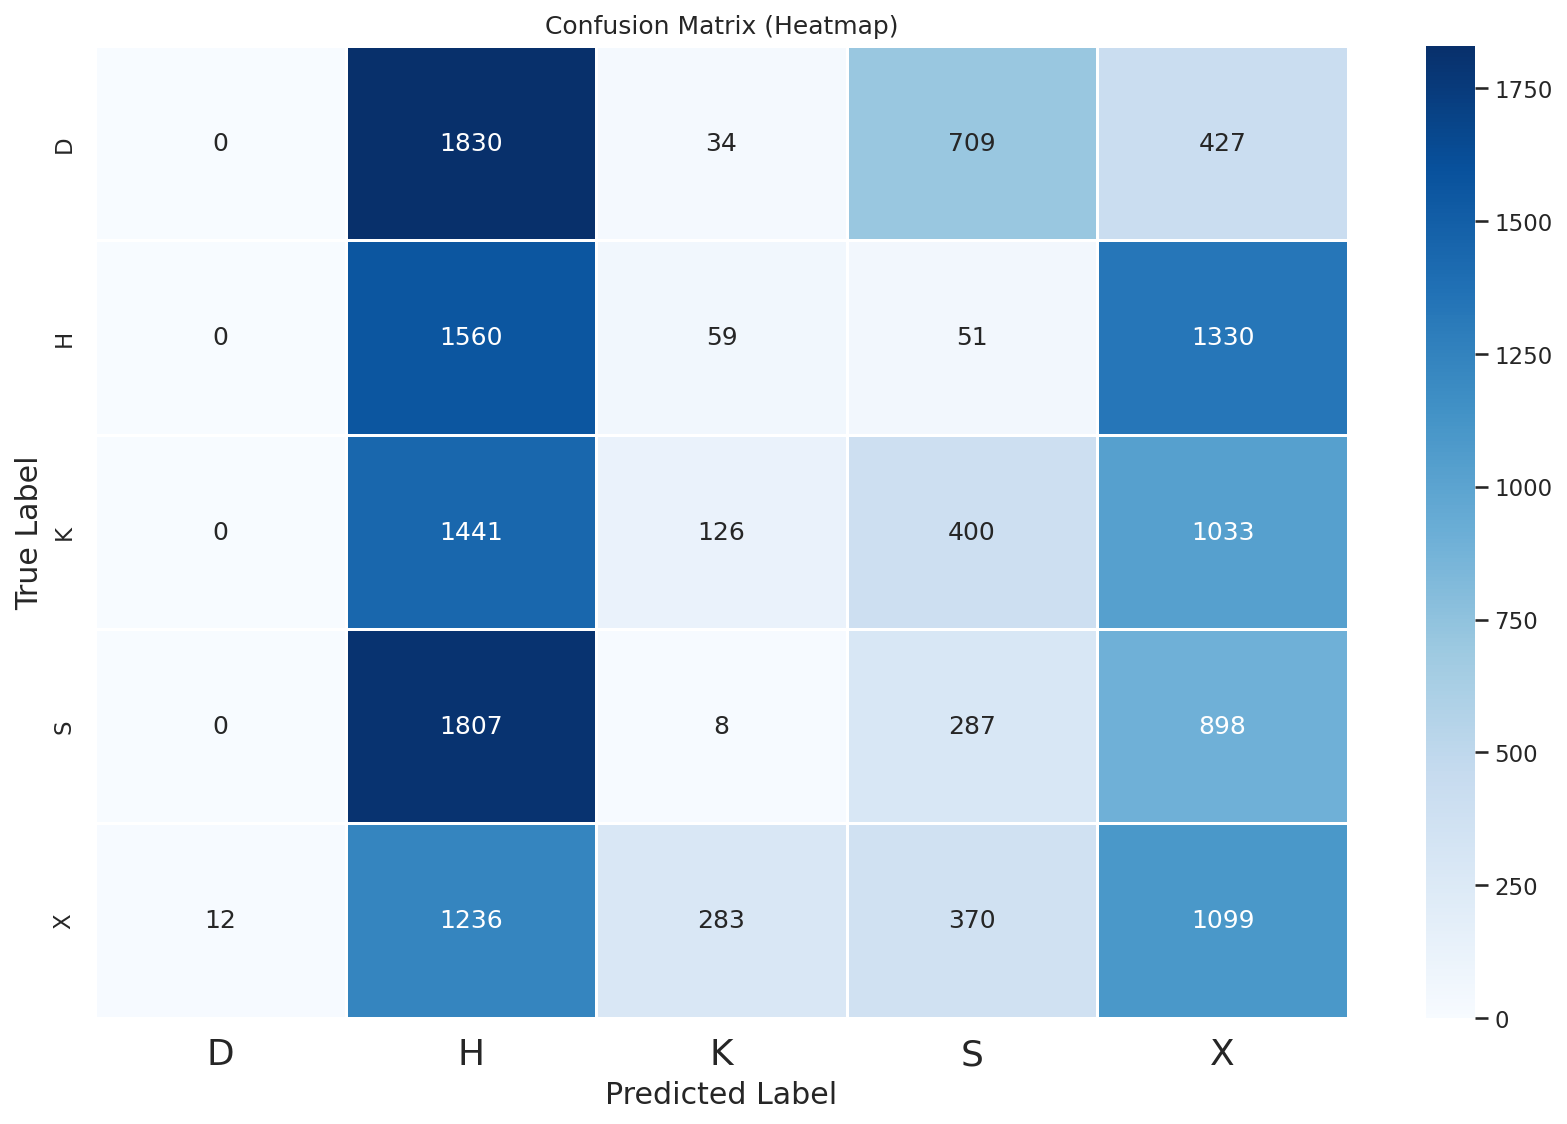

In [ ]:
# Set style for the plots
plt.style.use('fivethirtyeight')  # Apply the 'fivethirtyeight' plot style for a clean and simple look
sns.set(context="notebook", palette="dark", style='whitegrid', color_codes=True)  # Seaborn settings for style

# Global plot configuration parameters
params = {
    'axes.labelsize': "large",  # Set size of axes labels
    'xtick.labelsize': 'x-large',  # Set size of x-axis ticks
    'legend.fontsize': 20,  # Set font size for the legend
    'figure.dpi': 150,  # Set the figure resolution (higher is better for clarity)
    'figure.figsize': [25, 7]  # Set the size of the figure (width, height)
}

# Update the matplotlib parameters with the custom settings
plt.rcParams.update(params)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function plots the confusion matrix using a heatmap.
    Arguments:
        cm: Confusion matrix (2D array).
        classes: List of class labels for x and y axes.
        normalize: Whether to normalize the matrix (convert to percentages).
        title: Title of the confusion matrix plot.
        cmap: Color map to use for the heatmap.
    """
    if normalize:
        # Normalize the confusion matrix by dividing each row by its sum
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Create a heatmap for the confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)  # Set the title
    plt.colorbar()  # Add a color bar to the side
    tick_marks = np.arange(len(classes))  # Positions for the ticks
    plt.xticks(tick_marks, classes, rotation=45)  # Set the x-axis labels (rotated for readability)
    plt.yticks(tick_marks, classes)  # Set the y-axis labels

    # Loop through the matrix and add text annotations for each cell
    thresh = cm.max() / 2.  # Set threshold for text color
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f'{cm[i, j]:.2f}' if normalize else f'{cm[i, j]}',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")  # Text color based on value

    # Adjust layout to prevent overlap and improve spacing
    plt.tight_layout()
    plt.ylabel('True label')  # Label for y-axis
    plt.xlabel('Predicted label')  # Label for x-axis

# Make predictions
y_pred = model.predict(x_test)  # Get model predictions for the test data

labels_cm = ("D", "H", "K", "S", "X")  # Class labels for the confusion matrix

# Check the shape of y_test to understand if it's one-hot encoded or already a label array
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of y_pred: {y_pred.shape}")

# If y_test is one-hot encoded (2D array), convert it to 1D labels by getting the index of the maximum value in each row
if y_test.ndim > 1:
    y_test = np.argmax(y_test, axis=1)

# Calculate the confusion matrix by comparing the true labels (y_test) with the predicted labels (y_pred)
confusion_mtx = confusion_matrix(y_test, np.argmax(y_pred, axis=1))

# Create a DataFrame from the confusion matrix for better visualization
df_cm = pd.DataFrame(confusion_mtx, index=labels_cm, columns=labels_cm)
print("Confusion Matrix (DataFrame):")
print(df_cm)

# Plot the heatmap of the confusion matrix using seaborn
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues", linewidths=.5)  # Create the heatmap with integer format
plt.title("Confusion Matrix (Heatmap)")  # Title for the heatmap
plt.ylabel("True Label")  # Y-axis label
plt.xlabel("Predicted Label")  # X-axis label
plt.show()  # Display the plot

#SHAP
#### Representation to show points that have positive (red) or negative (blue) impact on correct predictions

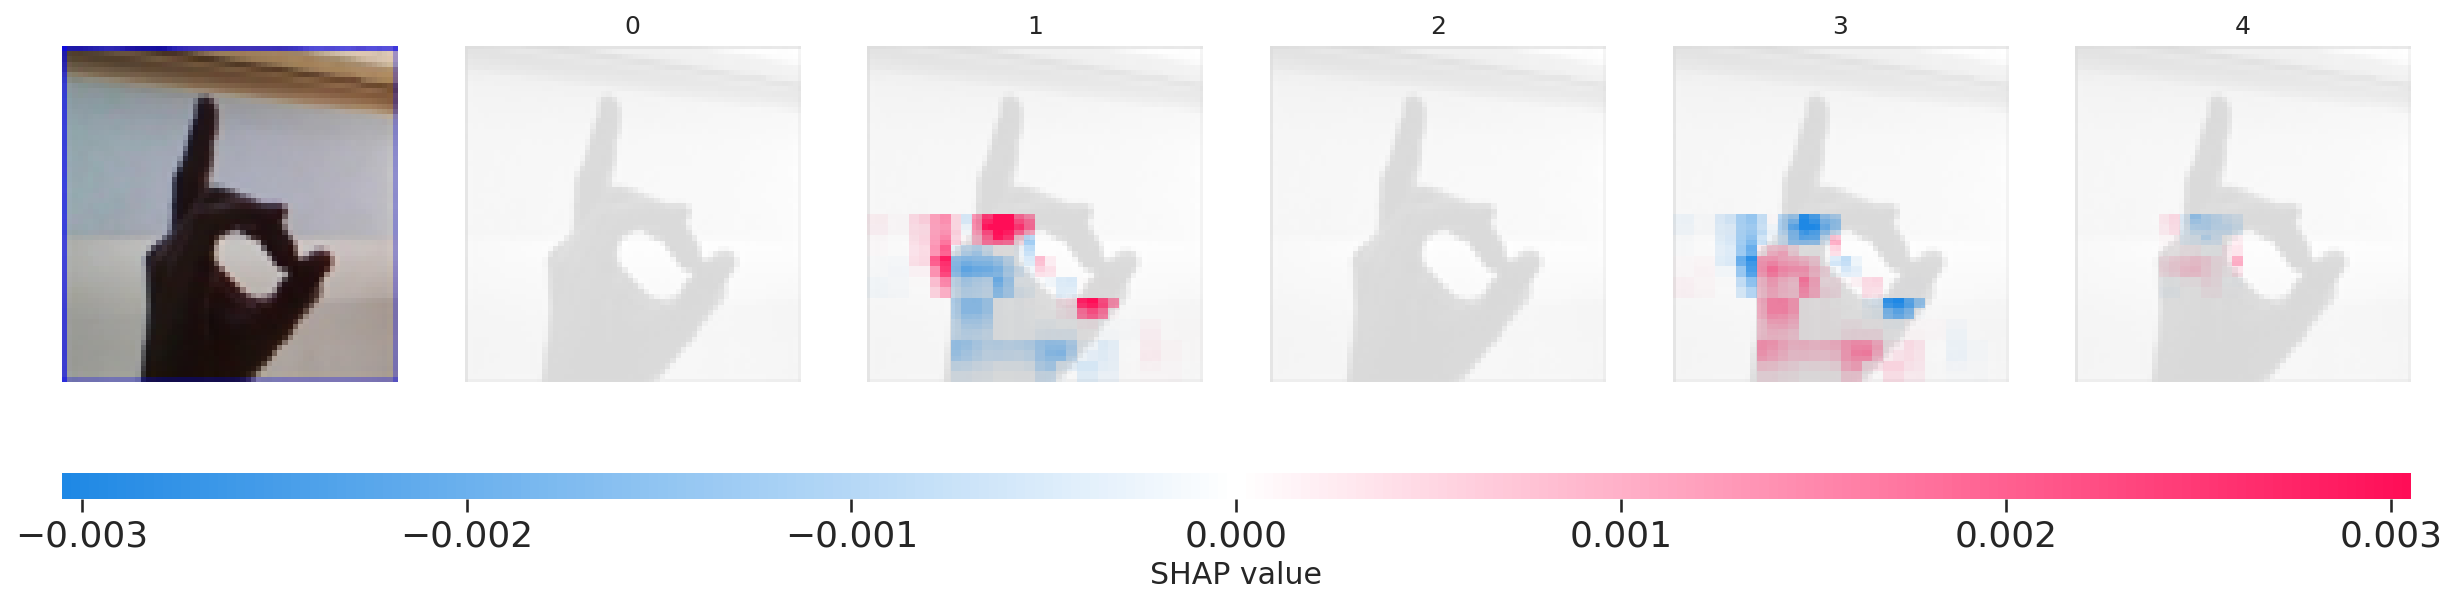

In [ ]:
# Assuming you have a pre-trained model called `model`
def f(x):
    """
    This function takes in input data 'x' and returns the model's predictions.
    We create a copy of the input to avoid modifying the original data.
    """
    tmp = x.copy()  # Creating a copy of input data to avoid changing the original
    return model(tmp)  # Return the model's predictions for the input

# Step 1: Define masker for image data (with a blur operation)
# Using SHAP's Image masker with a blur operation to highlight important regions of the image
masker_blur = shap.maskers.Image("blur(32,32)", x_test[0].shape)  # Adjust the blur size (32x32) if needed

# Step 2: Select the first image from x_test for evaluation
ind = [0]  # Use the first image (index 0) from the x_test array for SHAP computation

# Step 3: Check if the image is in the correct range (0-255 for integer pixel values)
x_test_processed = x_test[ind]  # Extract the image data

# Step 4: Ensure x_test_processed is in the correct pixel value range for the SHAP explainer
if x_test_processed.max() <= 255:
    # If pixel values are integers (0-255), clip them to this range
    x_test_processed = np.clip(x_test_processed, 0, 255)
elif x_test_processed.max() <= 1.0:
    # If pixel values are floats (0.0-1.0), clip them to this range
    x_test_processed = np.clip(x_test_processed, 0, 1)

# Step 5: Create the SHAP explainer
# SHAP explainer is created by passing the model function (f), masker (blur operation), and the output names (number of classes)
explainer = shap.Explainer(f, masker_blur, output_names=list(range(5)))  # Assuming there are 5 output classes

# Step 6: Calculate SHAP values for the selected image(s) from x_test
# We use SHAP to compute feature importances by comparing perturbations (using blur here)
shap_values_ = explainer(x_test_processed, max_evals=5000, batch_size=50)

# Step 7: Visualize the SHAP values for the selected image
# Use SHAP's built-in method to plot the SHAP values and highlight the most important parts of the image
shap.image_plot(shap_values_[0], show=True)  # Display the SHAP values on the image